# **PHASE 1 | IMPORTING LIBRARIES & DATASET**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="whitegrid")

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/powerconsumption.csv", encoding = "latin1")

In [3]:
df.head()

Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  01/01/17 0:00        6.559      73.8      0.083                0.051   
1  01/01/17 0:10        6.414      74.5      0.083                0.070   
2  01/01/17 0:20        6.313      74.5      0.080                0.062   
3  01/01/17 0:30        6.121      75.0      0.083                0.091   
4  01/01/17 0:40        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3  
0             20240.96386  
1             20131.08434  
2             19668.43373  
3             18899.27711  
4             18442.40964

In [4]:
print(f"Shape: ",df.shape)

Shape:  (52416, 9)


In [5]:
print(f"Non - Null Values:\n",df.count())

Non - Null Values:
 Datetime                  52416
Temperature               52416
Humidity                  52416
WindSpeed                 52416
GeneralDiffuseFlows       52416
DiffuseFlows              52416
PowerConsumption_Zone1    52416
PowerConsumption_Zone2    52416
PowerConsumption_Zone3    52416
dtype: int64


In [6]:
print(f"Discriptive Stats:\n",df.describe())

Discriptive Stats:
         Temperature      Humidity     WindSpeed  GeneralDiffuseFlows  \
count  52416.000000  52416.000000  52416.000000         52416.000000   
mean      18.810024     68.259518      1.959489           182.696614   
std        5.815476     15.551177      2.348862           264.400960   
min        3.247000     11.340000      0.050000             0.004000   
25%       14.410000     58.310000      0.078000             0.062000   
50%       18.780000     69.860000      0.086000             5.035500   
75%       22.890000     81.400000      4.915000           319.600000   
max       40.010000     94.800000      6.483000          1163.000000   

       DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
count  52416.000000            52416.000000            52416.000000   
mean      75.028022            32344.970564            21042.509082   
std      124.210949             7130.562564             5201.465892   
min        0.011000            13895.696200    

In [7]:
df.isnull().sum()

Datetime                  0
Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
PowerConsumption_Zone2    0
PowerConsumption_Zone3    0
dtype: int64

In [8]:
categorical_cols = df.select_dtypes(include = "object").columns
for col in categorical_cols:
    print(f"\n Value Counts for {col}:\n",df[col].value_counts().head())


 Value Counts for Datetime:
 Datetime
30/12/17 17:20    1
30/12/17 17:30    1
30/12/17 17:40    1
30/12/17 17:50    1
30/12/17 18:00    1
Name: count, dtype: int64


In [9]:
numerical_cols = df.select_dtypes(include = "number").columns
for col in numerical_cols:
    print(f"\n Value Counts for {col}: \n", df[col].value_counts().head())


 Value Counts for Temperature: 
 Temperature
15.18    58
20.76    56
19.79    55
20.74    52
15.84    51
Name: count, dtype: int64

 Value Counts for Humidity: 
 Humidity
85.9    197
84.6    190
85.0    189
86.6    187
86.3    186
Name: count, dtype: int64

 Value Counts for WindSpeed: 
 WindSpeed
0.082    2291
0.083    1979
0.084    1831
0.081    1804
0.085    1513
Name: count, dtype: int64

 Value Counts for GeneralDiffuseFlows: 
 GeneralDiffuseFlows
0.055    1576
0.062    1557
0.051    1497
0.059    1474
0.066    1459
Name: count, dtype: int64

 Value Counts for DiffuseFlows: 
 DiffuseFlows
0.115    1260
0.122    1218
0.119    1201
0.126    1150
0.111    1140
Name: count, dtype: int64

 Value Counts for PowerConsumption_Zone1: 
 PowerConsumption_Zone1
34560.00000    30
23040.00000    24
28800.00000    19
25920.00000    18
23672.42196    13
Name: count, dtype: int64

 Value Counts for PowerConsumption_Zone2: 
 PowerConsumption_Zone2
21600.00000    16
25200.00000    12
16158.83576   

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
# Parsing datetime feature

df["Datetime"] = pd.to_datetime(df["Datetime"])
print(f"\n Datetime Range: ",df["Datetime"].min()," to ", df["Datetime"].max())


 Datetime Range:  2017-01-01 00:00:00  to  2017-12-30 23:50:00


In [12]:
# Correlation with target (PowerConsumption_Zone3)

target = 'PowerConsumption_Zone3'
corr = df.corr()[target].sort_values(ascending = False)
print(f"\n Correlation with {target}:\n")
display(corr)


 Correlation with PowerConsumption_Zone3:



PowerConsumption_Zone3    1.000000
PowerConsumption_Zone1    0.750733
PowerConsumption_Zone2    0.570932
Temperature               0.489527
WindSpeed                 0.278641
GeneralDiffuseFlows       0.063376
DiffuseFlows             -0.038506
Datetime                 -0.143438
Humidity                 -0.233022
Name: PowerConsumption_Zone3, dtype: float64

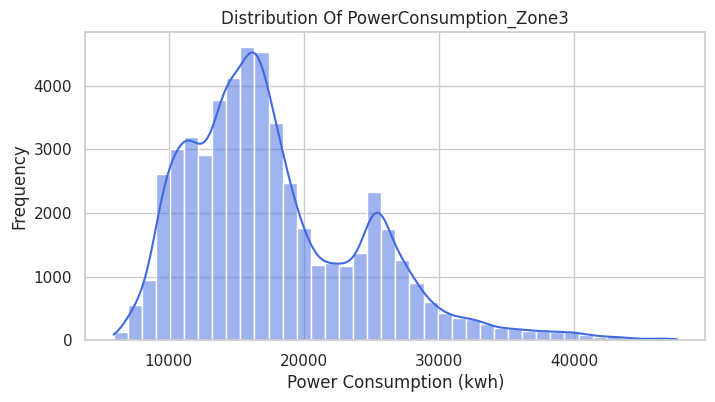

In [13]:
plt.figure(figsize = (8,4))
sns.histplot(df[target], bins = 40, kde = True, color = "royalblue")
plt.xlabel(f"Power Consumption (kwh)")
plt.ylabel(f"Frequency")
plt.title(f"Distribution Of {target}")
plt.show()

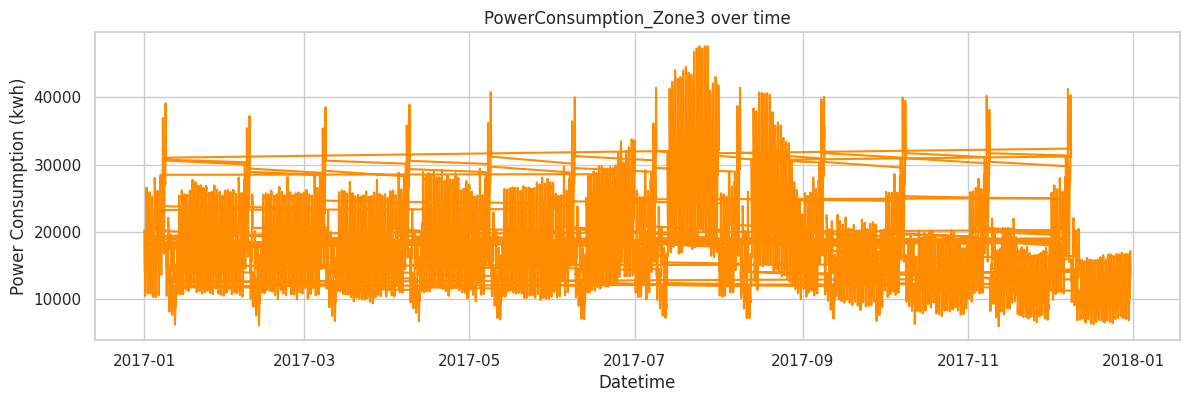

In [14]:
plt.figure(figsize = (14,4))
plt.plot(df["Datetime"], df[target], color = "darkorange")
plt.xlabel("Datetime")
plt.ylabel("Power Consumption (kwh)")
plt.title(f"{target} over time")
plt.show()

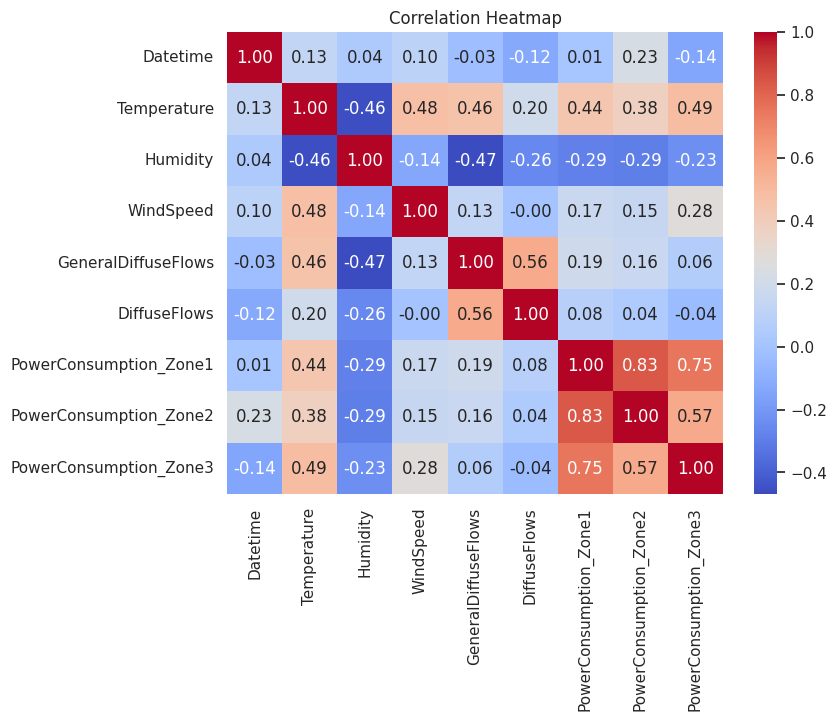

In [15]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, fmt =".2f", cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# **PHASE 2 | DATA CLEANING & FEATURE ENGINEERING**

In [16]:
# Time base feature extraction

df["Year"] = df["Datetime"].dt.year
df["Month"] = df["Datetime"].dt.month
df["Day"] = df["Datetime"].dt.day
df["Hour"] = df["Datetime"].dt.hour
df["DayOfWeek"] = df["Datetime"].dt.dayofweek
df["Is_Weekend"] = df["DayOfWeek"].apply(lambda x : 1 if x >= 5 else 0)

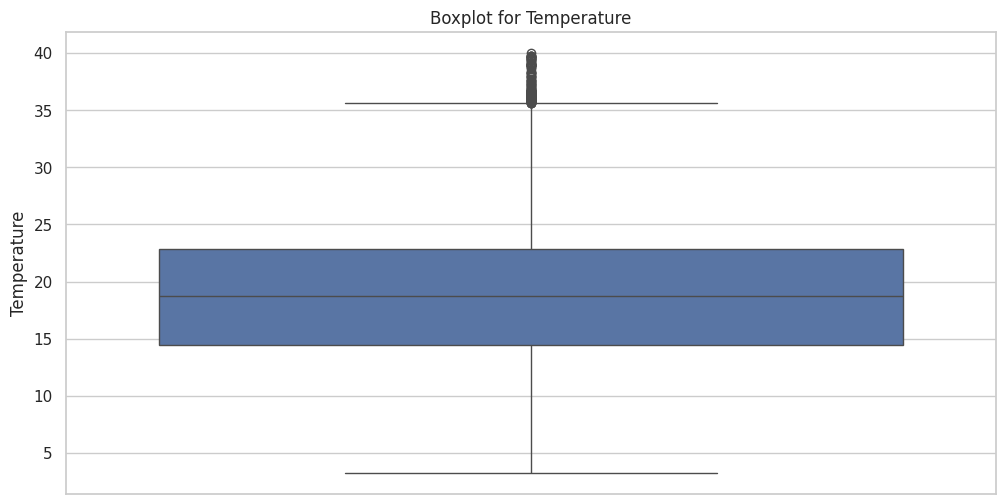

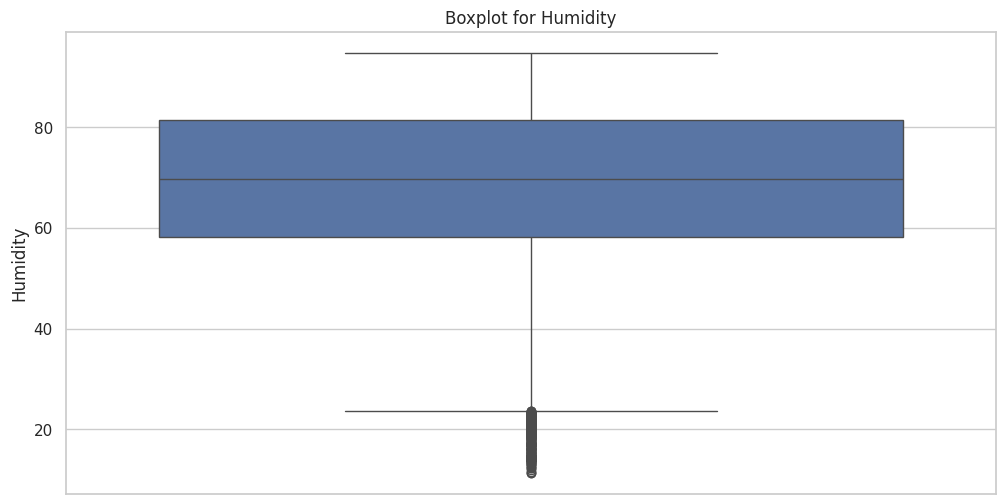

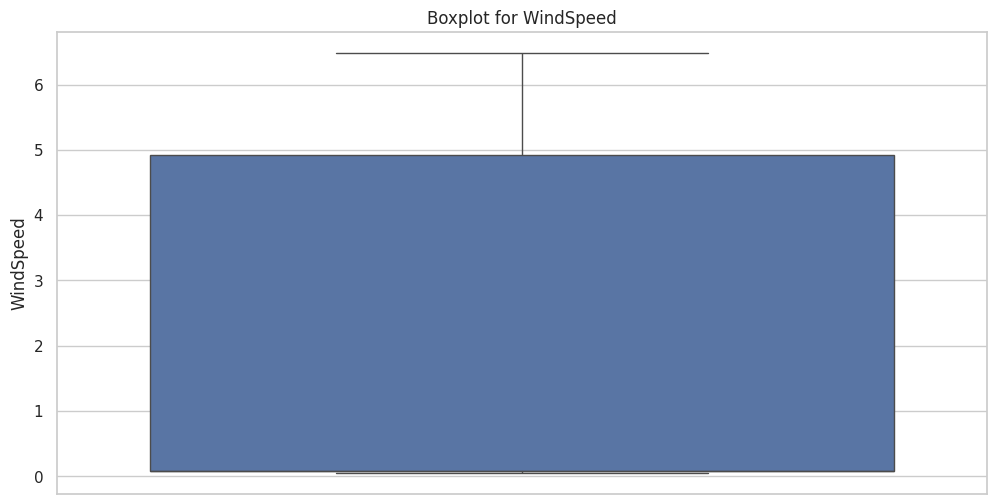

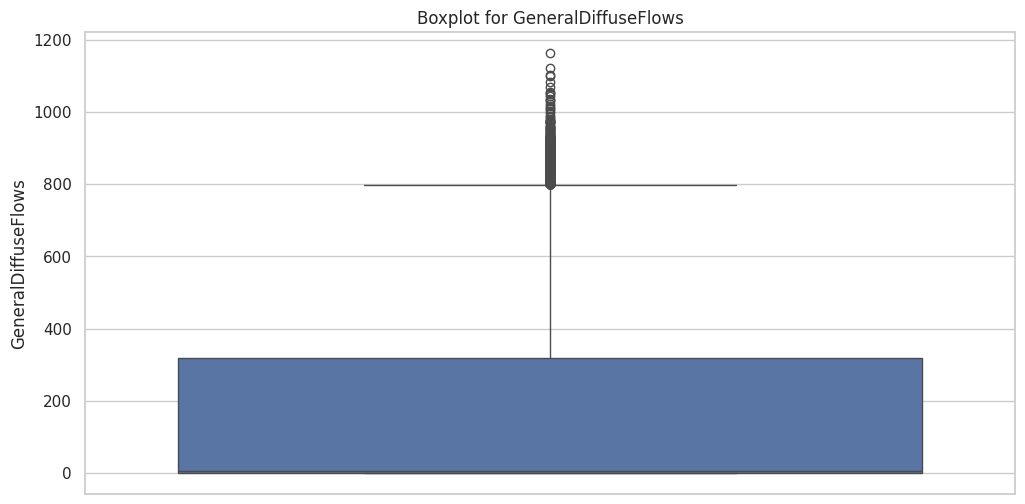

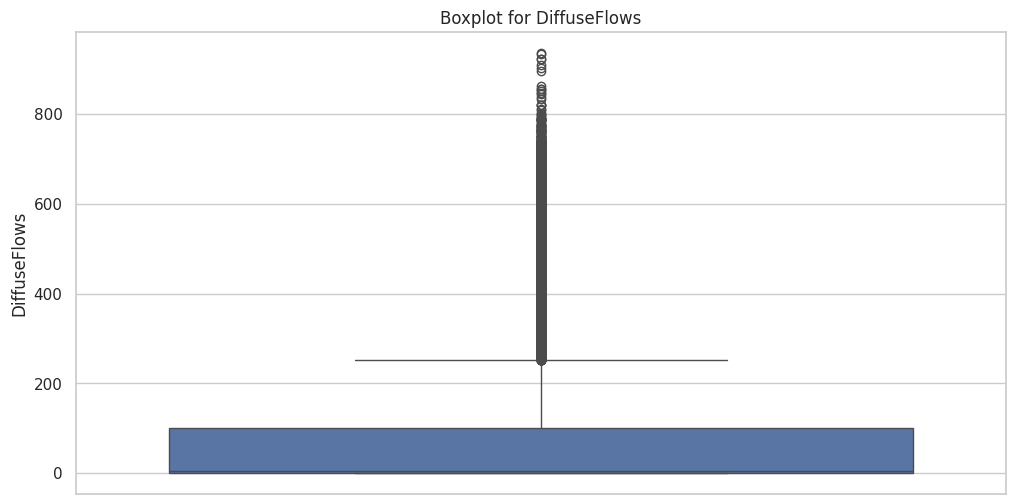

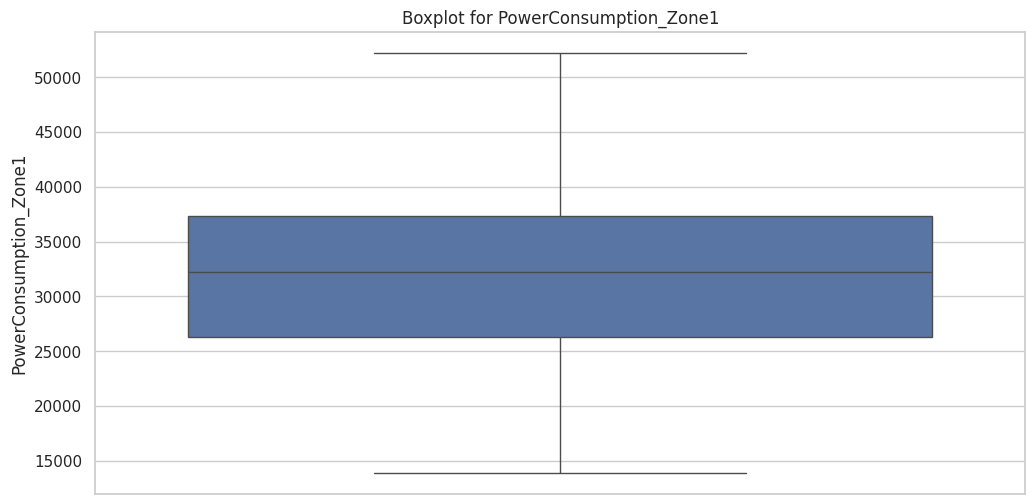

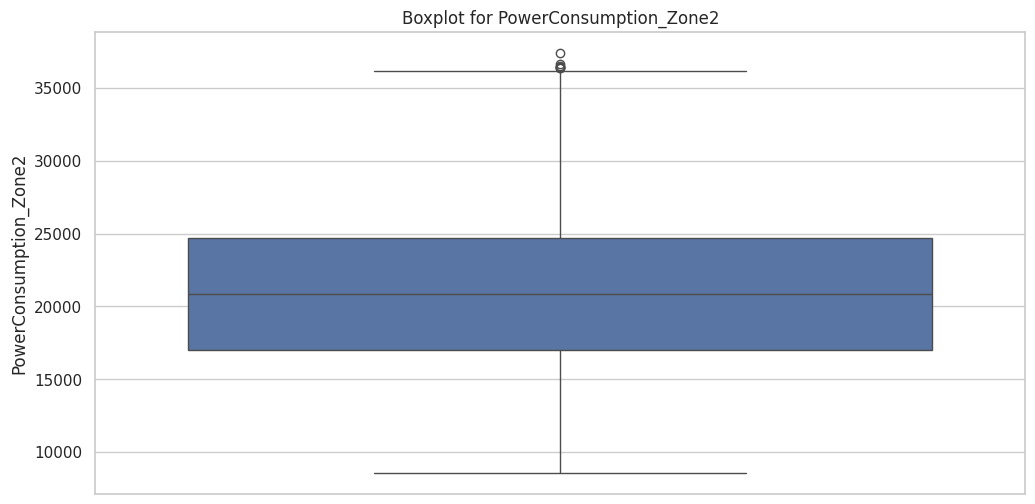

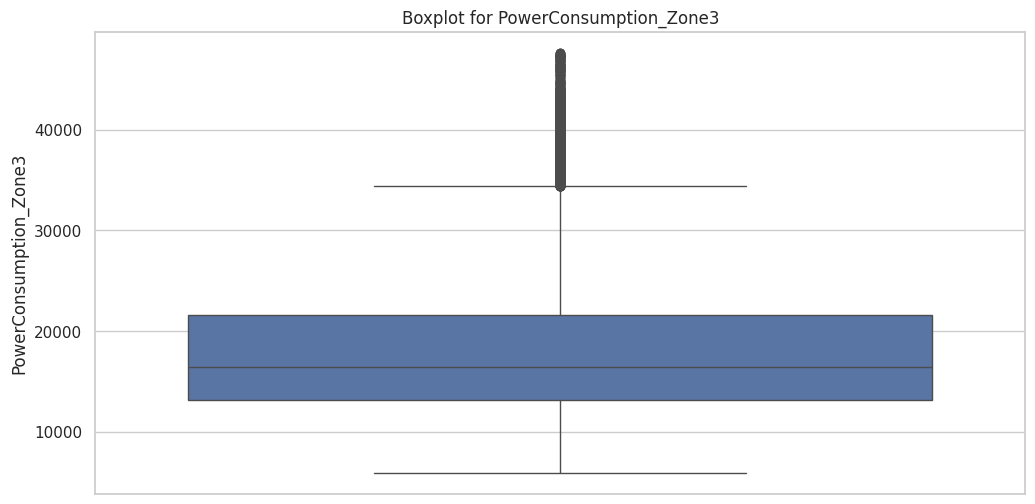

In [17]:
# Boxplot for outlier detection
for col in numerical_cols:
    plt.figure(figsize = (12,6))
    sns.boxplot(data = df[col])
    plt.title(f"Boxplot for {col}")
    plt.xticks(rotation = 45)
    plt.show()

In [18]:
for col in ['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows', 'DiffuseFlows']:
    Q1 = df[col].quantile(0.01)
    Q3 = df[col].quantile(0.99)
    df[col] = df[col].clip(Q1,Q3)

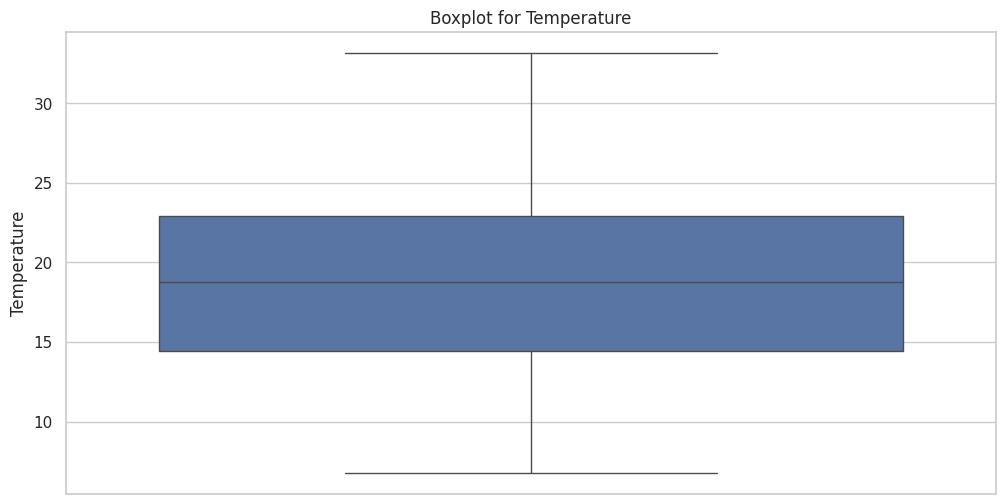

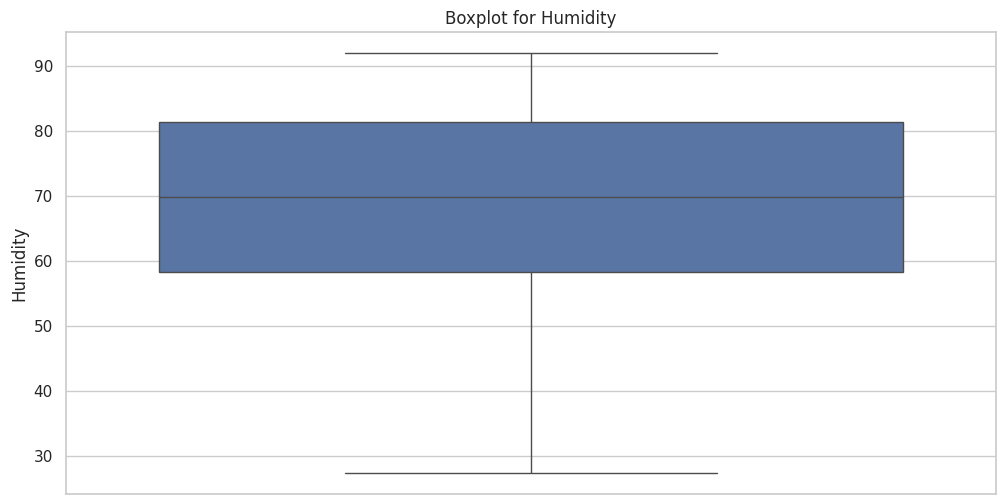

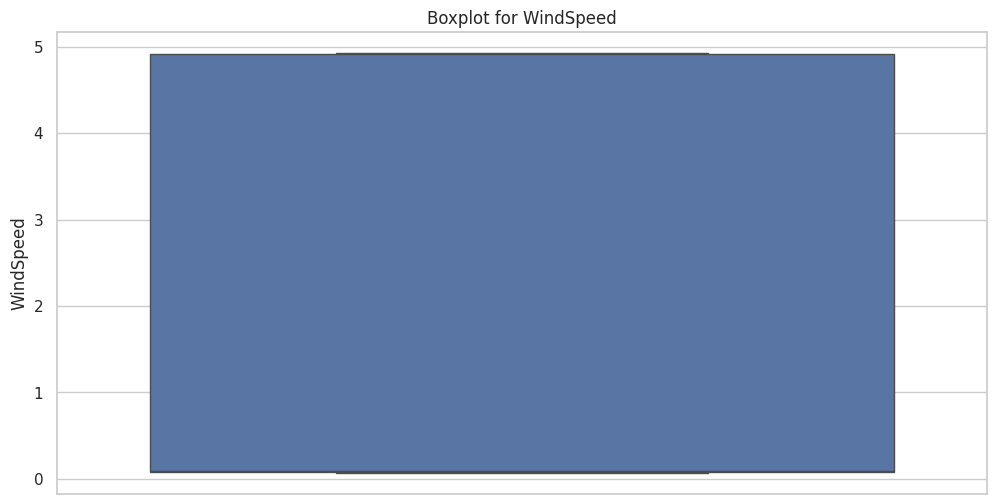

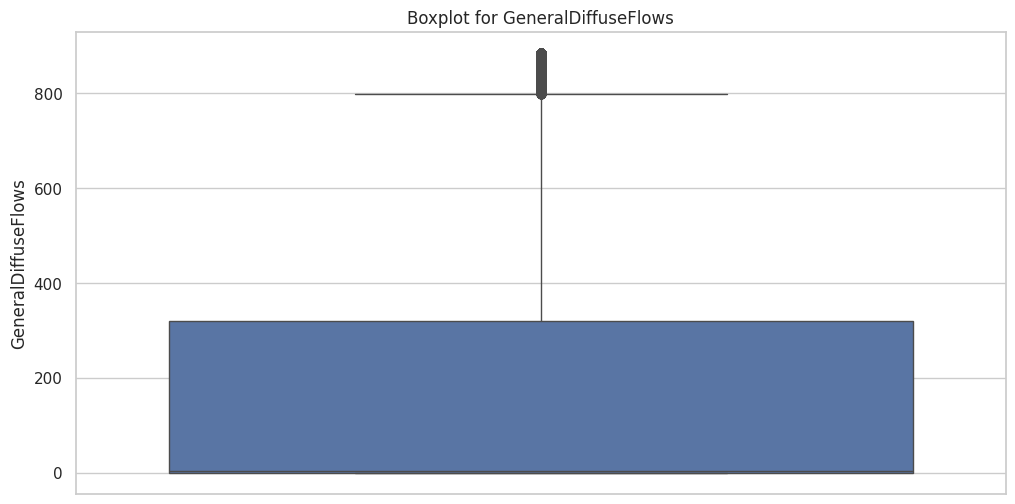

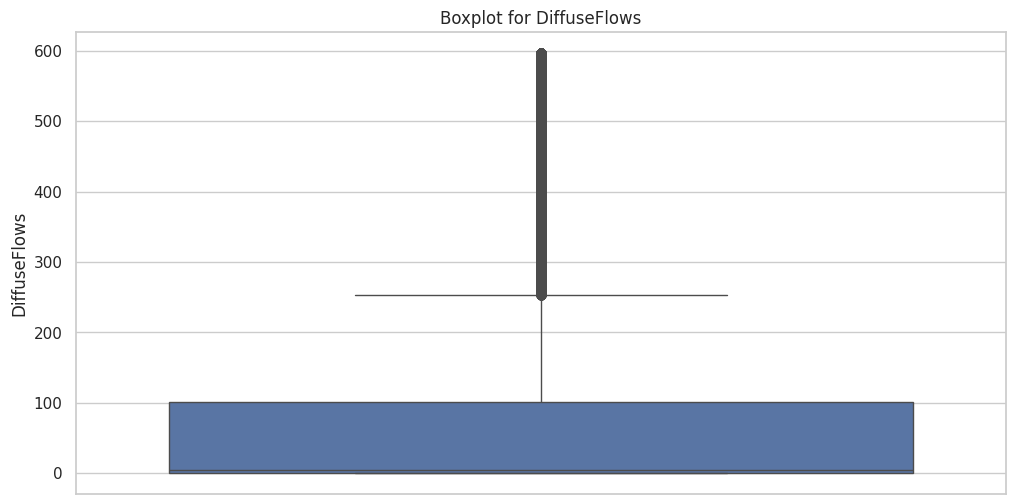

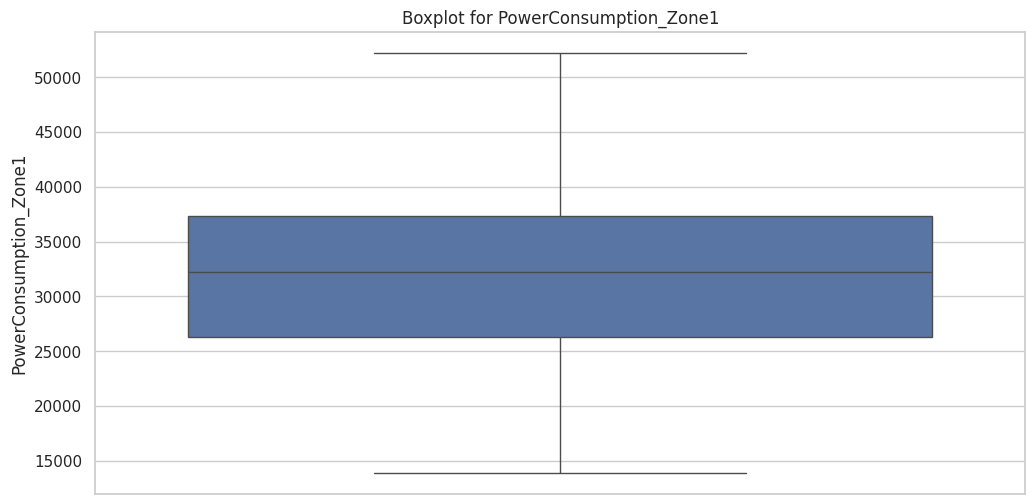

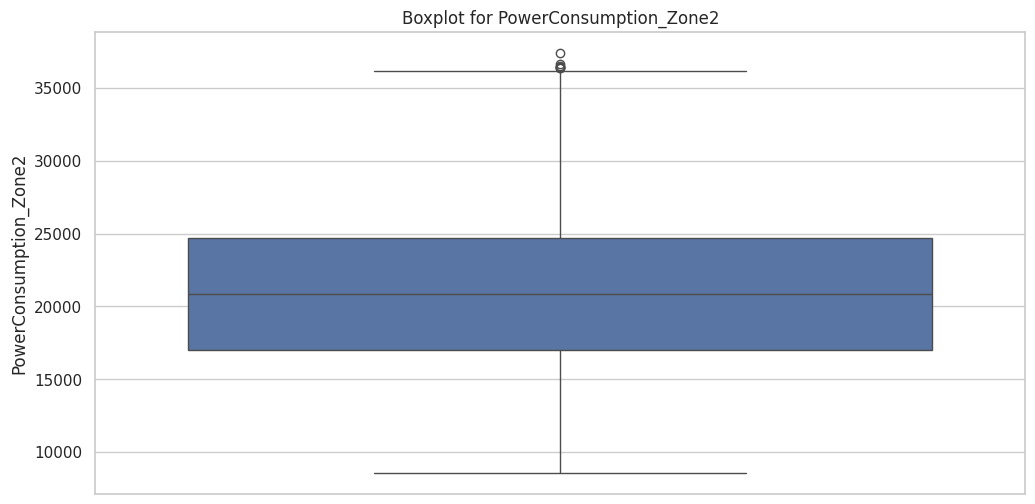

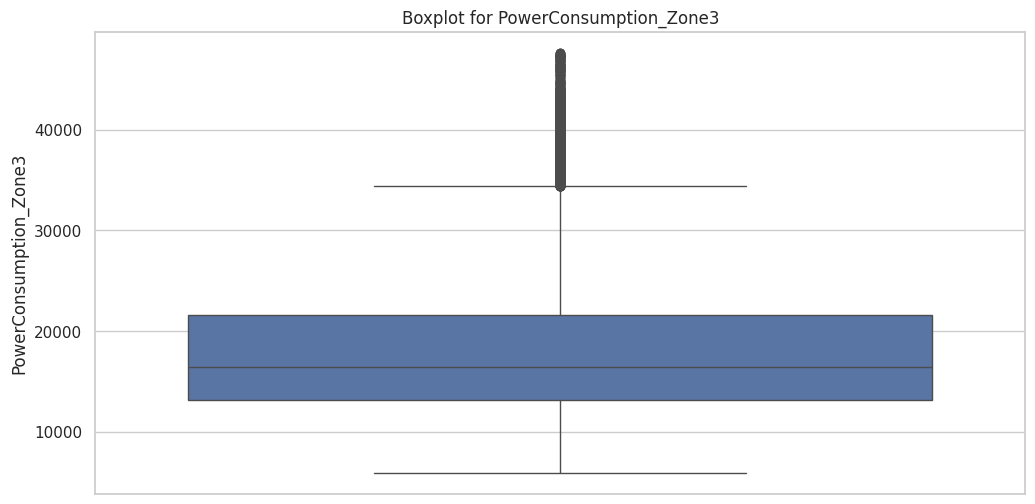

In [19]:
# Boxplot after outlier detection
for col in numerical_cols:
    plt.figure(figsize = (12,6))
    sns.boxplot(data = df[col])
    plt.title(f"Boxplot for {col}")
    plt.xticks(rotation = 45)
    plt.show()

Skewness of numeric features:
 DiffuseFlows              2.256025
GeneralDiffuseFlows       1.298114
PowerConsumption_Zone3    1.023871
WindSpeed                 0.462319
PowerConsumption_Zone2    0.328876
PowerConsumption_Zone1    0.228864
Temperature               0.160732
Humidity                 -0.568094
dtype: float64


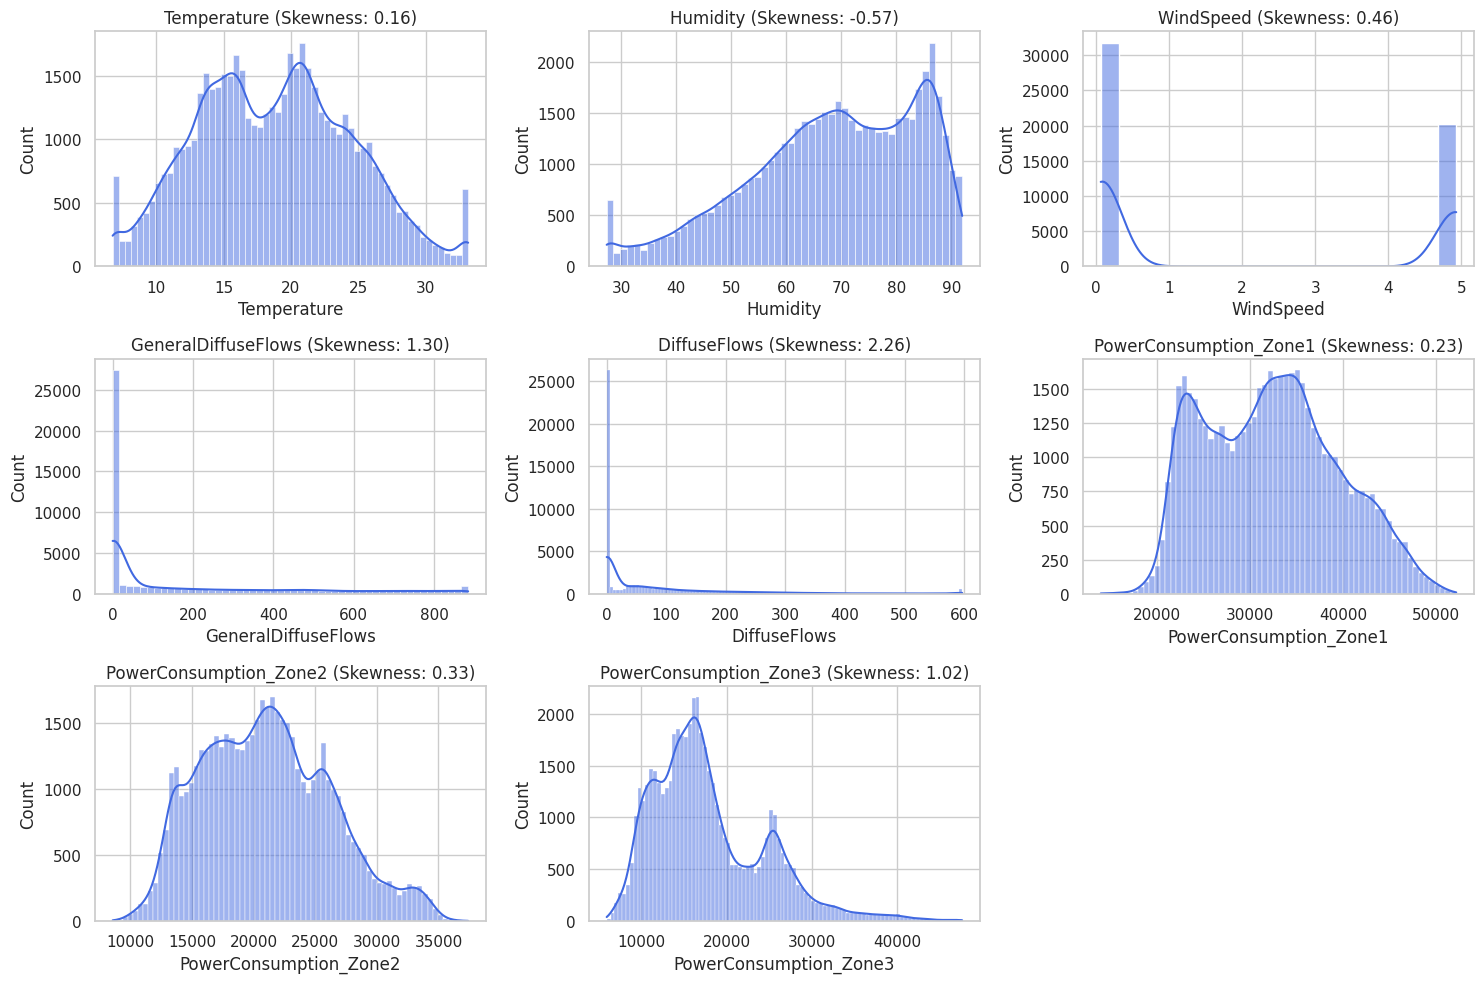

In [20]:
# Checking skewness of all numeric columns
skew_vals = df[numerical_cols].skew().sort_values(ascending=False)
print("Skewness of numeric features:\n", skew_vals)

# Visualizing distributions
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color='royalblue')
    plt.title(f"{col} (Skewness: {skew_vals[col]:.2f})")
plt.tight_layout()
plt.show()

In [21]:
# --- Manual winsorization using clip() and quantiles ---
def manual_winsorize(series, lower_q=0.01, upper_q=0.99):
    low = series.quantile(lower_q)
    high = series.quantile(upper_q)
    return series.clip(lower=low, upper=high)

# Applying recommended adaptive caps based on skewness:
df['DiffuseFlows'] = manual_winsorize(df['DiffuseFlows'], lower_q=0.05, upper_q=0.95)          # strong
df['GeneralDiffuseFlows'] = manual_winsorize(df['GeneralDiffuseFlows'], lower_q=0.02, upper_q=0.98) # mild
df['PowerConsumption_Zone3'] = manual_winsorize(df['PowerConsumption_Zone3'], lower_q=0.01, upper_q=0.99) # light

# quick checks
print("Skewness after manual winsorization:")
print(df[['DiffuseFlows','GeneralDiffuseFlows','PowerConsumption_Zone3']].skew().round(3))

Skewness after manual winsorization:
DiffuseFlows              1.500
GeneralDiffuseFlows       1.288
PowerConsumption_Zone3    0.922
dtype: float64


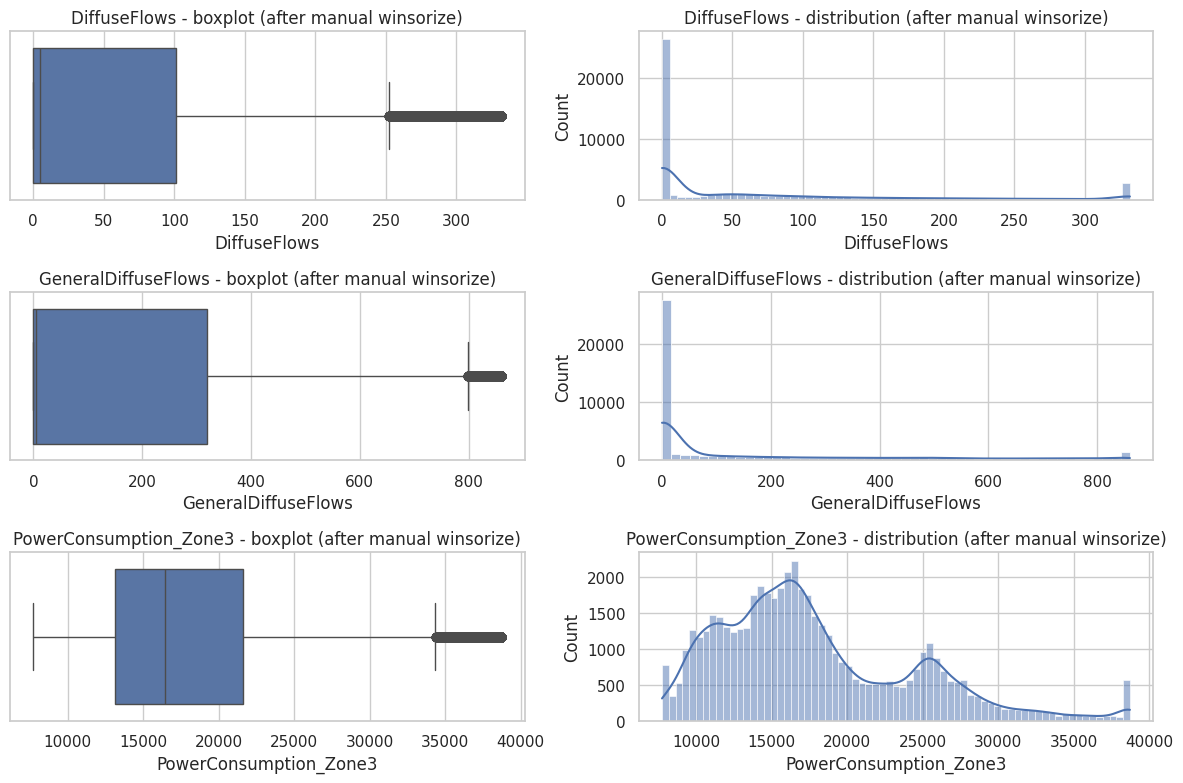

In [22]:
# Visual check
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['DiffuseFlows','GeneralDiffuseFlows','PowerConsumption_Zone3']
plt.figure(figsize=(12,8))
for i,c in enumerate(cols,1):
    plt.subplot(3,2,2*i-1)
    sns.boxplot(x=df[c])
    plt.title(f"{c} - boxplot (after manual winsorize)")
    plt.subplot(3,2,2*i)
    sns.histplot(df[c], kde=True)
    plt.title(f"{c} - distribution (after manual winsorize)")
plt.tight_layout()
plt.show()

In [23]:
df["DiffuseFlows"] = np.log1p(df["DiffuseFlows"])
df["GeneralDiffuseFlows"] = np.log1p(df["GeneralDiffuseFlows"])

In [24]:
print(df[['DiffuseFlows','GeneralDiffuseFlows','PowerConsumption_Zone3']].skew().round(3))

DiffuseFlows              0.196
GeneralDiffuseFlows       0.203
PowerConsumption_Zone3    0.922
dtype: float64


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.drop("Datetime", axis=1)
scaled_df = pd.DataFrame(scaler.fit_transform(df_scaled), columns = df_scaled.columns)

PowerConsumption_Zone3    1.000000
PowerConsumption_Zone1    0.752273
PowerConsumption_Zone2    0.570290
Temperature               0.488417
Hour                      0.455873
WindSpeed                 0.278040
DayOfWeek                 0.010184
Is_Weekend                0.008785
GeneralDiffuseFlows      -0.016273
DiffuseFlows             -0.032590
Day                      -0.044734
Month                    -0.143232
Humidity                 -0.229350
Year                           NaN
Name: PowerConsumption_Zone3, dtype: float64


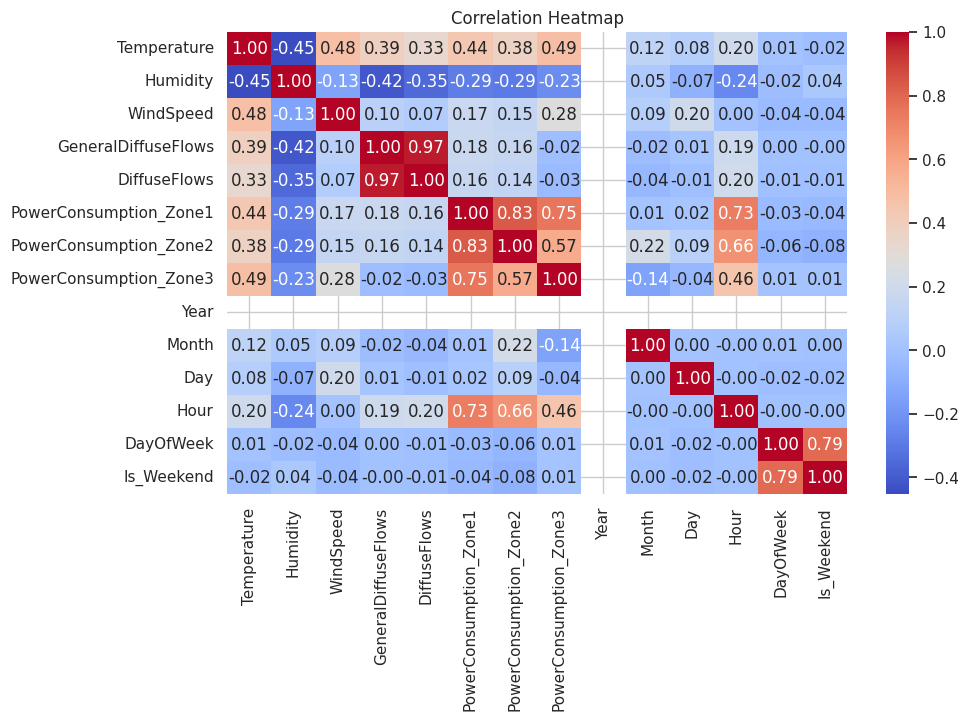

In [26]:
# Correlation matrix
corr_matrix = df_scaled.corr()

# Displaying top correlated features with PowerConsumption_Zone3
corr_target = corr_matrix["PowerConsumption_Zone3"].sort_values(ascending=False)
print(corr_target)

# Heatmap for visualization
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# **PHASE 3 | ADVANCED & STORYTELLING VISUALIZATIONS**

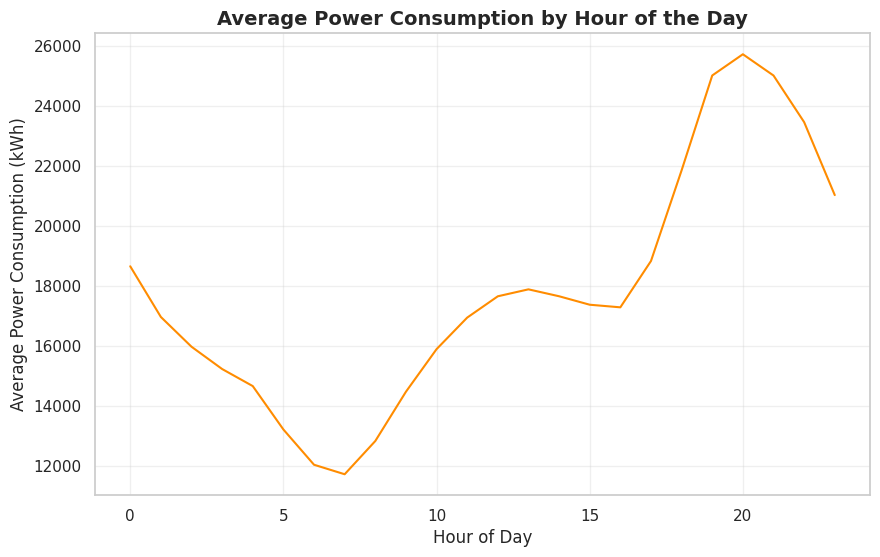

In [27]:
# 1. Power Consumption Trends by Hour

plt.figure(figsize=(10,6))
sns.lineplot(data=df, x="Hour", y="PowerConsumption_Zone3", estimator="mean", ci=None, color="darkorange")
plt.title("Average Power Consumption by Hour of the Day", fontsize=14, weight='bold')
plt.xlabel("Hour of Day")
plt.ylabel("Average Power Consumption (kWh)")
plt.grid(alpha=0.3)
plt.show()

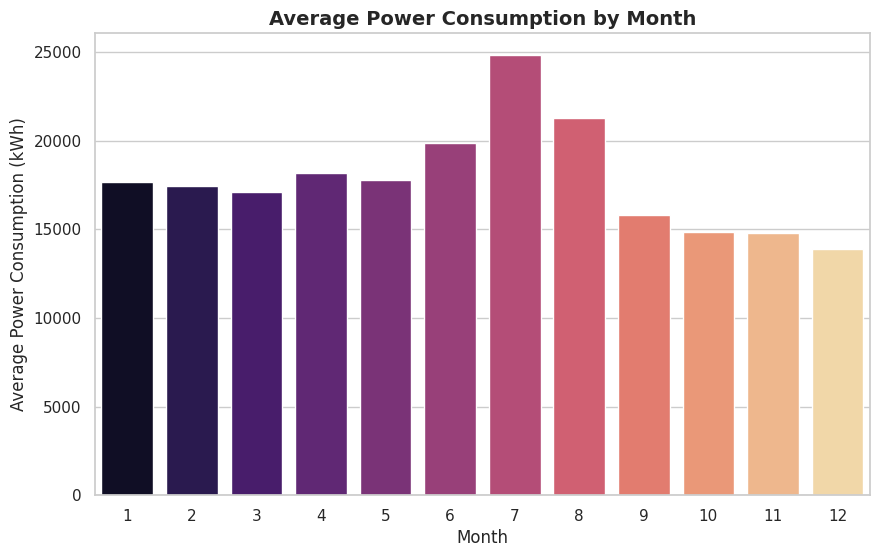

In [28]:
# 2. Monthly Consumption Patterns
plt.figure(figsize=(10,6))
monthly_avg = df.groupby("Month")["PowerConsumption_Zone3"].mean().reset_index()
sns.barplot(data=monthly_avg, x="Month", y="PowerConsumption_Zone3", palette="magma")
plt.title("Average Power Consumption by Month", fontsize=14, weight='bold')
plt.xlabel("Month")
plt.ylabel("Average Power Consumption (kWh)")
plt.show()

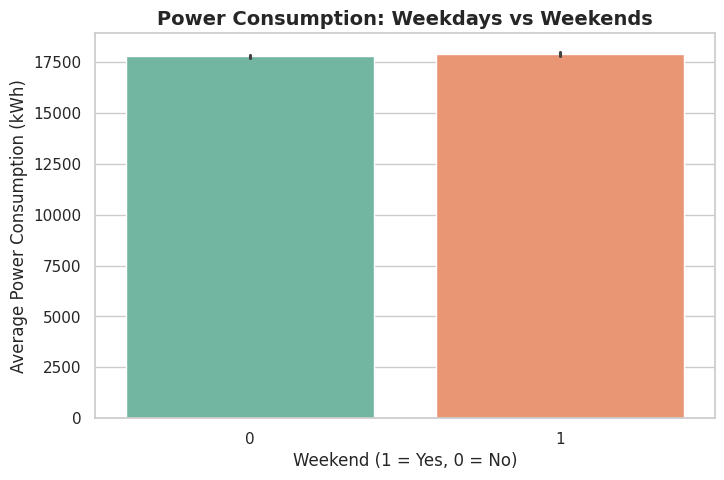

In [29]:
# 3. Weekday vs Weekend Comparison
plt.figure(figsize=(8,5))
sns.barplot(x="Is_Weekend", y="PowerConsumption_Zone3", data=df, palette="Set2")
plt.title("Power Consumption: Weekdays vs Weekends", fontsize=14, weight='bold')
plt.xlabel("Weekend (1 = Yes, 0 = No)")
plt.ylabel("Average Power Consumption (kWh)")
plt.show()

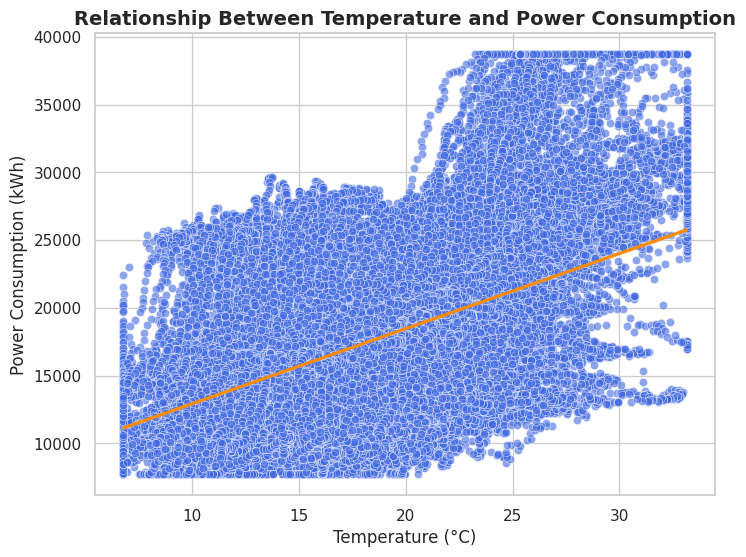

In [30]:
# 4. Temperature vs Power Consumption
plt.figure(figsize=(8,6))
sns.scatterplot(x="Temperature", y="PowerConsumption_Zone3", data=df, alpha=0.6, color="royalblue")
sns.regplot(x="Temperature", y="PowerConsumption_Zone3", data=df, scatter=False, color="darkorange")
plt.title("Relationship Between Temperature and Power Consumption", fontsize=14, weight='bold')
plt.xlabel("Temperature (°C)")
plt.ylabel("Power Consumption (kWh)")
plt.show()

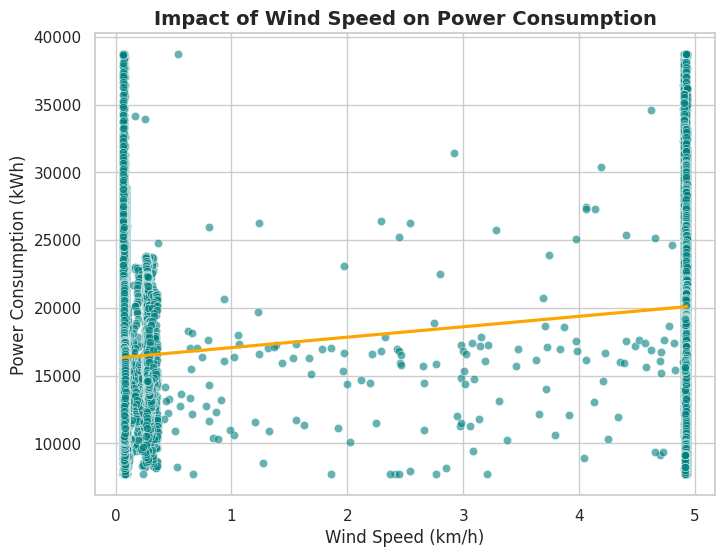

In [31]:
# 5. Wind Speed vs Power Consumption
plt.figure(figsize=(8,6))
sns.scatterplot(x="WindSpeed", y="PowerConsumption_Zone3", data=df, alpha=0.6, color="teal")
sns.regplot(x="WindSpeed", y="PowerConsumption_Zone3", data=df, scatter=False, color="orange")
plt.title("Impact of Wind Speed on Power Consumption", fontsize=14, weight='bold')
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Power Consumption (kWh)")
plt.show()

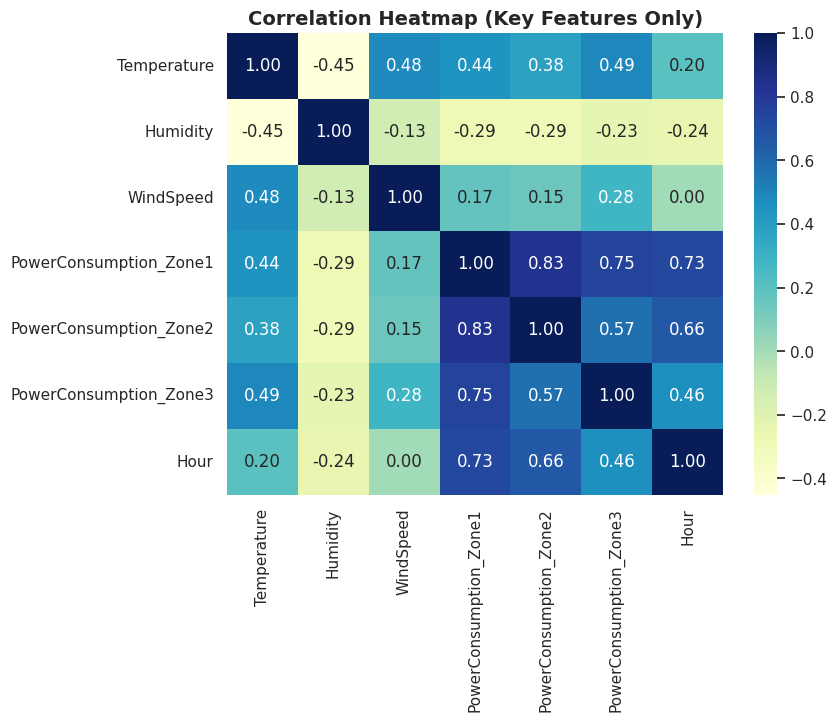

In [32]:
# 6. Heatmap of Key Features
plt.figure(figsize=(8,6))
key_features = ["Temperature", "Humidity", "WindSpeed", "PowerConsumption_Zone1", "PowerConsumption_Zone2", "PowerConsumption_Zone3", "Hour"]
sns.heatmap(df[key_features].corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap (Key Features Only)", fontsize=14, weight='bold')
plt.show()

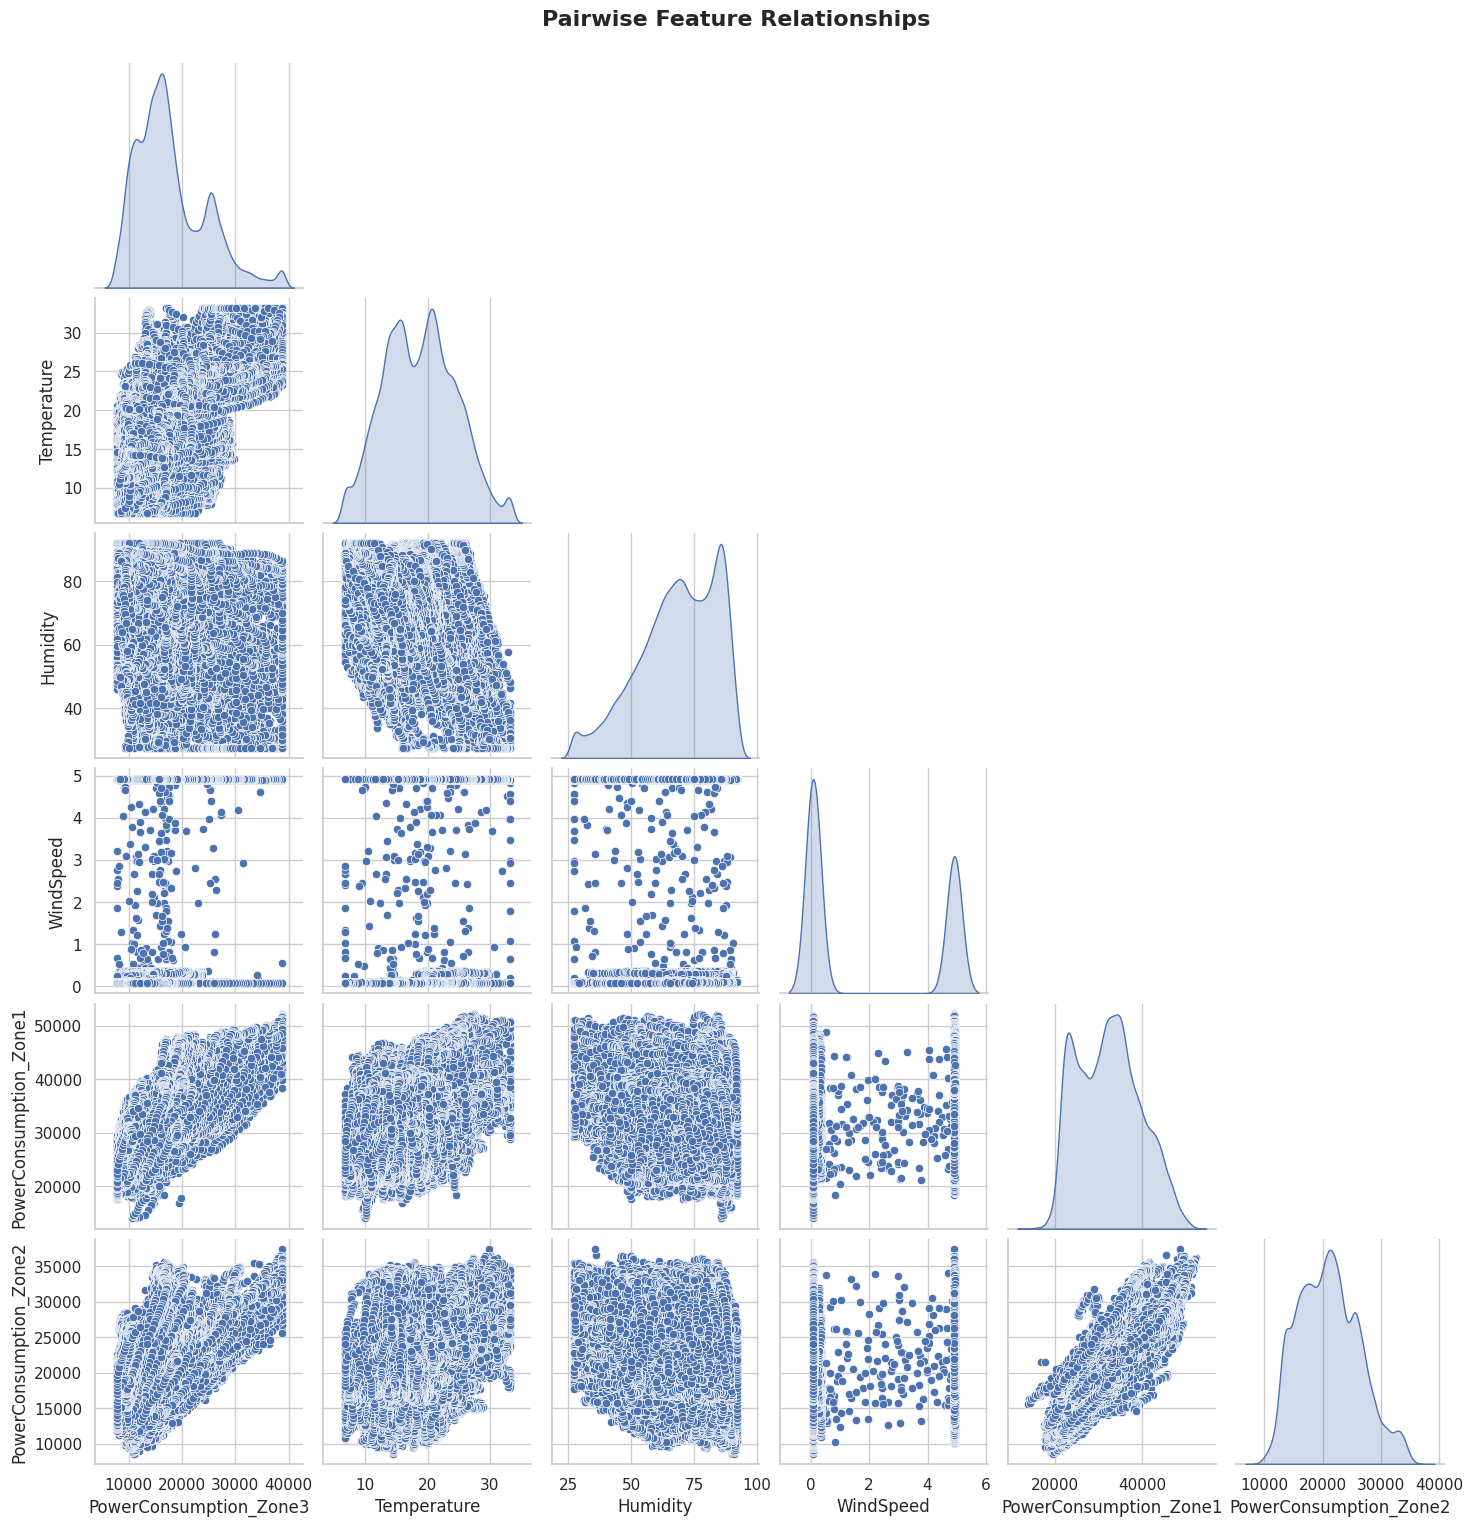

In [33]:
# 7. Pair Plot
sns.pairplot(df[["PowerConsumption_Zone3","Temperature","Humidity","WindSpeed","PowerConsumption_Zone1","PowerConsumption_Zone2"]], diag_kind="kde", corner=True)
plt.suptitle("Pairwise Feature Relationships", y=1.02, fontsize=16, weight='bold')
plt.show()

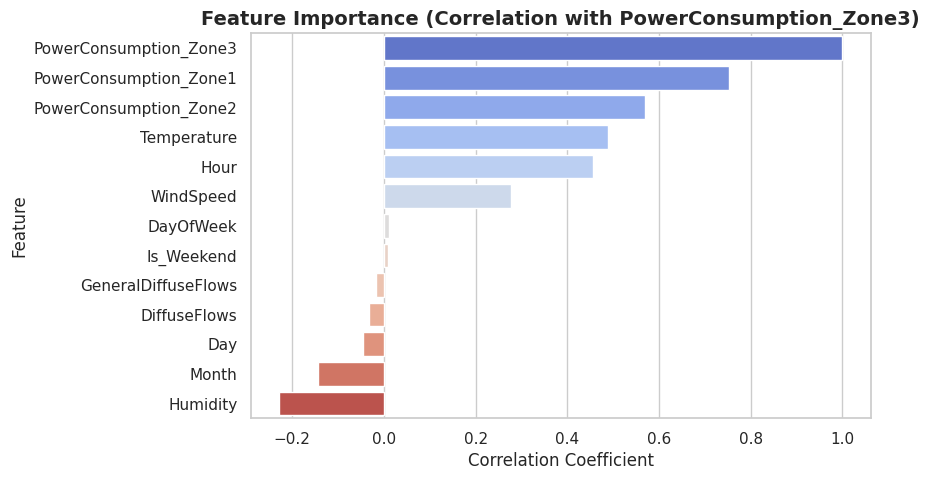

In [34]:
# 8. Feature Importance
plt.figure(figsize=(8,5))
corr_target.dropna(inplace=True)
sns.barplot(x=corr_target.values, y=corr_target.index, palette="coolwarm")
plt.title("Feature Importance (Correlation with PowerConsumption_Zone3)", fontsize=14, weight='bold')
plt.xlabel("Correlation Coefficient")
plt.ylabel("Feature")
plt.show()

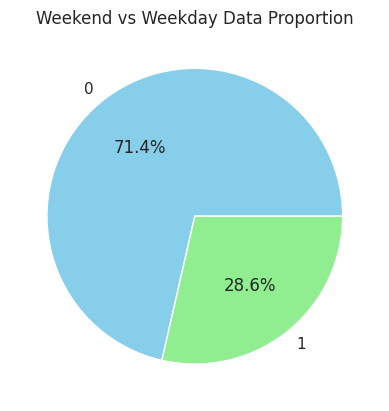

In [35]:
# 9. Pie Chart — Categorical Summary
df['Is_Weekend'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title("Weekend vs Weekday Data Proportion")
plt.ylabel('')
plt.show()

# **PHASE 4 | MACHINE LEARNING**

In [36]:
target_col = "PowerConsumption_Zone3"

# Selecting meaningful features
features = [
    "Temperature", "Humidity", "WindSpeed",
    "PowerConsumption_Zone1", "PowerConsumption_Zone2",
    "Hour", "DayOfWeek", "Is_Weekend", "Month"
]

X = df[features]
y = df[target_col]

# =============== TRAIN-TEST SPLIT (TIME-AWARE) ===============
n = len(X)
split_idx = int(n * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# =============== SCALING NUMERIC FEATURES ===============
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =============== METRICS FUNCTION ===============
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(name, model, X_test, y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"\n===== {name.upper()} =====")
    print(f"RMSE : {rmse:,.2f} kWh")
    print(f"MAE  : {mae:,.2f} kWh")
    print(f"R²   : {r2:.4f}")
    return pd.DataFrame([[name, rmse, mae, r2]], columns=["Model", "RMSE", "MAE", "R²"])

results = pd.DataFrame(columns=["Model", "RMSE", "MAE", "R²"])

# =============== MODEL 1: LINEAR REGRESSION ===============
from sklearn.linear_model import LinearRegression
lr_v3 = LinearRegression()
lr_v3.fit(X_train_scaled, y_train)
y_pred_lr = lr_v3.predict(X_test_scaled)
results = pd.concat([results, evaluate_model("Linear Regression v3", lr_v3, X_test_scaled, y_test, y_pred_lr)], ignore_index=True)

# =============== MODEL 2: RIDGE REGRESSION ===============
from sklearn.linear_model import Ridge
ridge_v3 = Ridge(alpha=1.0)
ridge_v3.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_v3.predict(X_test_scaled)
results = pd.concat([results, evaluate_model("Ridge Regression v3", ridge_v3, X_test_scaled, y_test, y_pred_ridge)], ignore_index=True)

# =============== MODEL 3: LASSO REGRESSION ===============
from sklearn.linear_model import Lasso
lasso_v3 = Lasso(alpha=0.001)
lasso_v3.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_v3.predict(X_test_scaled)
results = pd.concat([results, evaluate_model("Lasso Regression v3", lasso_v3, X_test_scaled, y_test, y_pred_lasso)], ignore_index=True)

# =============== MODEL 4: ELASTICNET REGRESSION ===============
from sklearn.linear_model import ElasticNet
elastic_v3 = ElasticNet(alpha=0.001, l1_ratio=0.5)
elastic_v3.fit(X_train_scaled, y_train)
y_pred_elastic = elastic_v3.predict(X_test_scaled)
results = pd.concat([results, evaluate_model("ElasticNet v3", elastic_v3, X_test_scaled, y_test, y_pred_elastic)], ignore_index=True)

# =============== MODEL 5: RANDOM FOREST REGRESSOR ===============
from sklearn.ensemble import RandomForestRegressor
rf_v3 = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf_v3.fit(X_train, y_train)
y_pred_rf = rf_v3.predict(X_test)
results = pd.concat([results, evaluate_model("Random Forest v3", rf_v3, X_test, y_test, y_pred_rf)], ignore_index=True)

# =============== MODEL 6: XGBOOST REGRESSOR ===============
from xgboost import XGBRegressor
xgb_v3 = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_v3.fit(X_train, y_train)
y_pred_xgb = xgb_v3.predict(X_test)
results = pd.concat([results, evaluate_model("XGBoost v3", xgb_v3, X_test, y_test, y_pred_xgb)], ignore_index=True)

# =============== MODEL PERFORMANCE SUMMARY ===============
print("\n===== MODEL PERFORMANCE SUMMARY =====")
display(results.sort_values(by="RMSE", ascending=True).reset_index(drop=True))



===== LINEAR REGRESSION V3 =====
RMSE : 7,515.17 kWh
MAE  : 6,760.33 kWh
R²   : -4.3096

===== RIDGE REGRESSION V3 =====
RMSE : 7,514.96 kWh
MAE  : 6,760.15 kWh
R²   : -4.3093

===== LASSO REGRESSION V3 =====
RMSE : 7,515.17 kWh
MAE  : 6,760.33 kWh
R²   : -4.3096

===== ELASTICNET V3 =====
RMSE : 7,510.85 kWh
MAE  : 6,756.50 kWh
R²   : -4.3035

===== RANDOM FOREST V3 =====
RMSE : 5,742.20 kWh
MAE  : 5,062.61 kWh
R²   : -2.0998

===== XGBOOST V3 =====
RMSE : 6,190.19 kWh
MAE  : 5,627.71 kWh
R²   : -2.6024

===== MODEL PERFORMANCE SUMMARY =====


Model         RMSE          MAE        R²
0      Random Forest v3  5742.196748  5062.612991 -2.099830
1            XGBoost v3  6190.189665  5627.709969 -2.602381
2         ElasticNet v3  7510.853109  6756.504626 -4.303472
3   Ridge Regression v3  7514.959580  6760.149860 -4.309273
4   Lasso Regression v3  7515.166512  6760.334105 -4.309565
5  Linear Regression v3  7515.166705  6760.333865 -4.309565

Fitting 5 folds for each of 20 candidates, totalling 100 fits

===== BEST RANDOM FOREST PARAMETERS =====
{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}

===== RANDOM FOREST (FINE-TUNED) PERFORMANCE =====
RMSE : 0.79 kWh
MAE  : 0.71 kWh
R²   : -1.4902


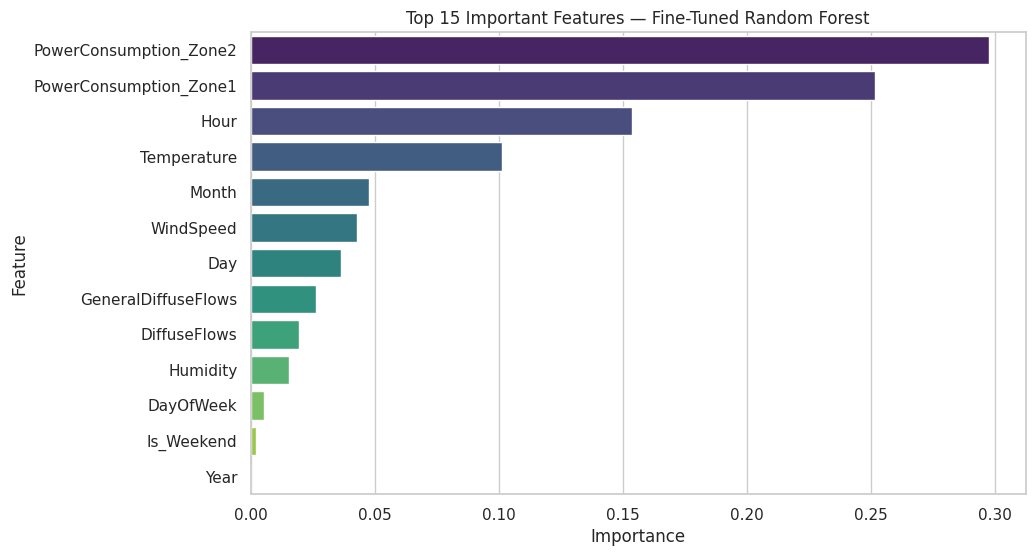

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# --- Step 1: Define X and y ---
X = scaled_df.drop("PowerConsumption_Zone3", axis=1)
y = scaled_df["PowerConsumption_Zone3"]

# --- Step 2: Time-aware split (80% train, 20% test) ---
split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

# --- Step 3: Define Random Forest and parameter grid ---
rf = RandomForestRegressor(random_state=42)

param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# --- Step 4: TimeSeriesSplit to maintain order ---
tscv = TimeSeriesSplit(n_splits=5)

# --- Step 5: RandomizedSearchCV for faster search ---
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=20,
    cv=tscv,
    scoring='neg_mean_squared_error',
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

# --- Step 6: Best parameters and model evaluation ---
best_rf = rf_random.best_estimator_
print("\n===== BEST RANDOM FOREST PARAMETERS =====")
print(rf_random.best_params_)

y_pred = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n===== RANDOM FOREST (FINE-TUNED) PERFORMANCE =====")
print(f"RMSE : {rmse:,.2f} kWh")
print(f"MAE  : {mae:,.2f} kWh")
print(f"R²   : {r2:.4f}")

# --- Step 7: Feature importance visualization ---
import matplotlib.pyplot as plt
import seaborn as sns

importances = best_rf.feature_importances_
feat_imp = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp.head(15), palette='viridis')
plt.title("Top 15 Important Features — Fine-Tuned Random Forest")
plt.show()



===== RANDOM FOREST (GENERALIZED - ORIGINAL SCALE) =====
RMSE : 5,146.62 kWh
MAE  : 4,605.70 kWh
R²   : -1.4902


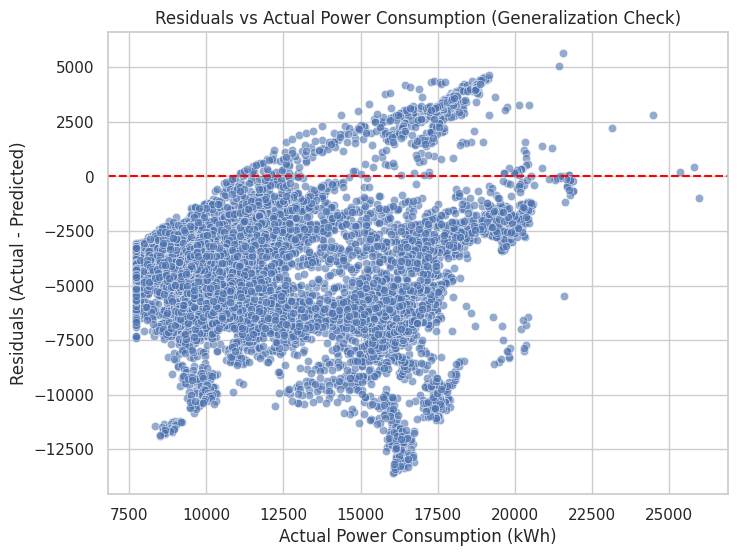

In [38]:
# **PHASE 4.2 | RANDOM FOREST GENERALIZATION CHECK (ORIGINAL SCALE)**

# Extract the scaler used earlier
from sklearn.preprocessing import StandardScaler

# Assuming 'scaler' was fit on the full df_scaled earlier
# Recreate target scaler to inverse transform only the target column
y_scaler = StandardScaler()
y_scaler.fit(df[['PowerConsumption_Zone3']])

# Inverse transform predictions and actuals
y_test_original = y_scaler.inverse_transform(y_test.values.reshape(-1,1)).ravel()
y_pred_original = y_scaler.inverse_transform(y_pred.reshape(-1,1)).ravel()

# Recalculate metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae_original = mean_absolute_error(y_test_original, y_pred_original)
r2_original = r2_score(y_test_original, y_pred_original)

print("\n===== RANDOM FOREST (GENERALIZED - ORIGINAL SCALE) =====")
print(f"RMSE : {rmse_original:,.2f} kWh")
print(f"MAE  : {mae_original:,.2f} kWh")
print(f"R²   : {r2_original:.4f}")

# Residual Plot
import matplotlib.pyplot as plt
import seaborn as sns

residuals = y_test_original - y_pred_original
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_original, y=residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Actual Power Consumption (Generalization Check)")
plt.xlabel("Actual Power Consumption (kWh)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

✅ Downsampled dataset shape: (364, 15)
Date range: 2017-01-01 00:00:00 → 2017-12-30 00:00:00

Fitting SARIMA model... this may take 1–3 minutes depending on data size.
✅ SARIMA model fitted successfully.


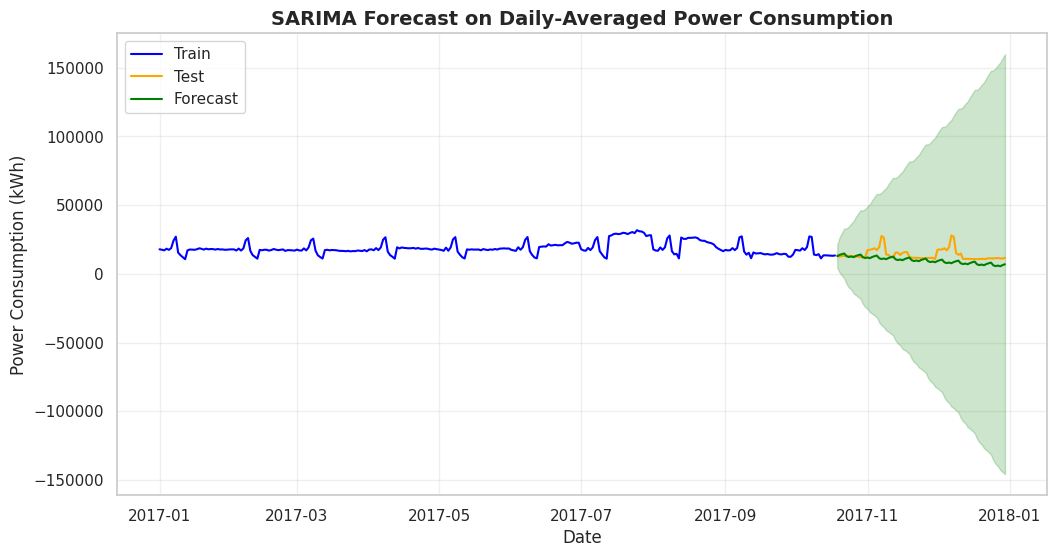


===== SARIMA (Generalized - Daily Data) =====
RMSE : 5989.27 kWh
MAE  : 4405.31 kWh
R²   : -1.2134


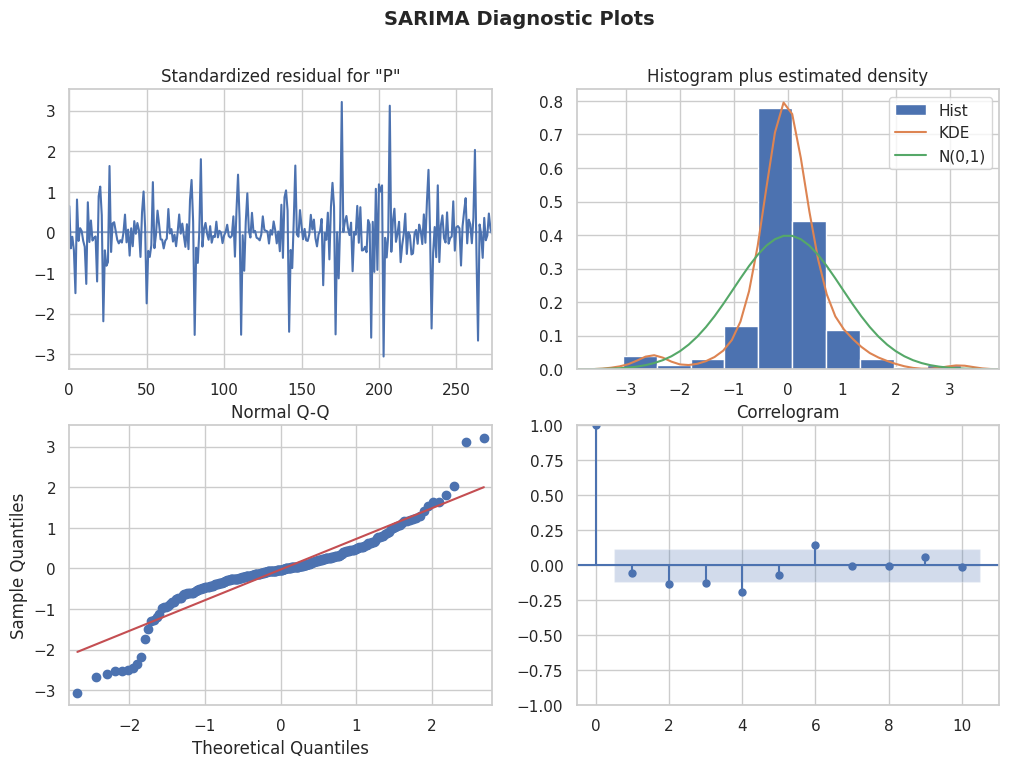

In [39]:
# ==========================================================
# PHASE 5 | TIME SERIES MODEL — SARIMA (Optimized for Low RAM)
# ==========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

warnings.filterwarnings("ignore")

# --- Step 1: Downsample data to daily average to save RAM ---
datetime_col = "Datetime"
target = "PowerConsumption_Zone3"

df_down = df.copy()
df_down[datetime_col] = pd.to_datetime(df_down[datetime_col])
df_down = df_down.set_index(datetime_col).resample("D").mean().dropna().reset_index()

print(f"✅ Downsampled dataset shape: {df_down.shape}")
print(f"Date range: {df_down[datetime_col].min()} → {df_down[datetime_col].max()}")

# --- Step 2: Train-test split (last 20% as test set) ---
train_size = int(len(df_down) * 0.8)
train, test = df_down.iloc[:train_size], df_down.iloc[train_size:]

# --- Step 3: Fit SARIMA model with simple, stable parameters ---
print("\nFitting SARIMA model... this may take 1–3 minutes depending on data size.")
sarima_model = SARIMAX(
    train[target],
    order=(1, 1, 1),         # (p, d, q)
    seasonal_order=(1, 1, 1, 7),  # (P, D, Q, s) – 7 for weekly seasonality
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_result = sarima_model.fit(disp=False)
print("✅ SARIMA model fitted successfully.")

# --- Step 4: Forecast & visualize ---
forecast = sarima_result.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

plt.figure(figsize=(12, 6))
plt.plot(train[datetime_col], train[target], label="Train", color="blue")
plt.plot(test[datetime_col], test[target], label="Test", color="orange")
plt.plot(test[datetime_col], forecast_mean, label="Forecast", color="green")
plt.fill_between(test[datetime_col],
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1],
                 color="green", alpha=0.2)
plt.title("SARIMA Forecast on Daily-Averaged Power Consumption", fontsize=14, weight='bold')
plt.xlabel("Date")
plt.ylabel("Power Consumption (kWh)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# --- Step 5: Evaluate performance ---
rmse = np.sqrt(mean_squared_error(test[target], forecast_mean))
mae = mean_absolute_error(test[target], forecast_mean)
r2 = r2_score(test[target], forecast_mean)

print("\n===== SARIMA (Generalized - Daily Data) =====")
print(f"RMSE : {rmse:.2f} kWh")
print(f"MAE  : {mae:.2f} kWh")
print(f"R²   : {r2:.4f}")

# --- Step 6: Show residual diagnostics (optional but insightful) ---
sarima_result.plot_diagnostics(figsize=(12, 8))
plt.suptitle("SARIMA Diagnostic Plots", fontsize=14, weight='bold')
plt.show()


Fitting scaled SARIMA model (optimized)...
✅ SARIMA fitted successfully.

===== FINAL SARIMA (Scaled + Optimized) =====
RMSE : 4000.11 kWh
MAE  : 3069.27 kWh
R²   : 0.0127


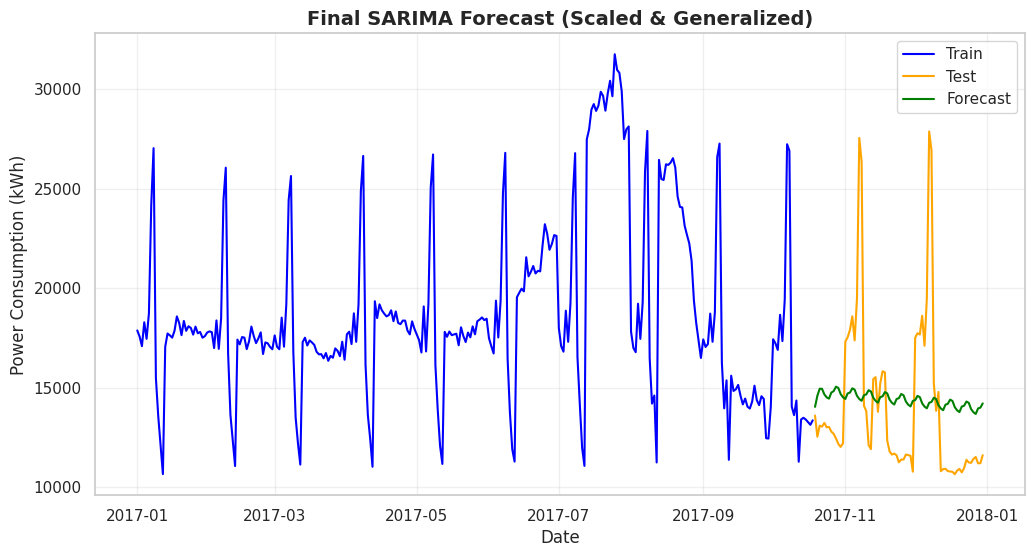

In [40]:
# ==========================================================
# FINAL SARIMA MODEL (with target scaling + safe parameters)
# ==========================================================
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# ---- Step 1: Prepare daily average data ----
datetime_col = "Datetime"
target = "PowerConsumption_Zone3"

df_down = df.copy()
df_down[datetime_col] = pd.to_datetime(df_down[datetime_col])
df_down = df_down.set_index(datetime_col).resample("D").mean().dropna().reset_index()

# ---- Step 2: Normalize target variable ----
scaler = MinMaxScaler()
df_down["Scaled_Target"] = scaler.fit_transform(df_down[[target]])

# ---- Step 3: Train-test split ----
train_size = int(len(df_down) * 0.8)
train, test = df_down.iloc[:train_size], df_down.iloc[train_size:]

# ---- Step 4: Fit SARIMA model ----
print("Fitting scaled SARIMA model (optimized)...")
sarima_model = SARIMAX(
    train["Scaled_Target"],
    order=(1, 1, 2),
    seasonal_order=(1, 1, 1, 7),
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_result = sarima_model.fit(disp=False)
print("✅ SARIMA fitted successfully.")

# ---- Step 5: Forecast ----
forecast_scaled = sarima_result.get_forecast(steps=len(test))
forecast_scaled_mean = forecast_scaled.predicted_mean

# ---- Step 6: Invert scaling ----
forecast_mean = scaler.inverse_transform(forecast_scaled_mean.values.reshape(-1,1)).flatten()

# ---- Step 7: Evaluate ----
rmse = np.sqrt(mean_squared_error(test[target], forecast_mean))
mae = mean_absolute_error(test[target], forecast_mean)
r2 = r2_score(test[target], forecast_mean)

print("\n===== FINAL SARIMA (Scaled + Optimized) =====")
print(f"RMSE : {rmse:.2f} kWh")
print(f"MAE  : {mae:.2f} kWh")
print(f"R²   : {r2:.4f}")

# ---- Step 8: Plot ----
plt.figure(figsize=(12,6))
plt.plot(train[datetime_col], train[target], label="Train", color="blue")
plt.plot(test[datetime_col], test[target], label="Test", color="orange")
plt.plot(test[datetime_col], forecast_mean, label="Forecast", color="green")
plt.title("Final SARIMA Forecast (Scaled & Generalized)", fontsize=14, weight='bold')
plt.xlabel("Date")
plt.ylabel("Power Consumption (kWh)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [43]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime')

time_diff = df['Datetime'].diff().mode()[0]
print("Most common time gap between rows:", time_diff)

Most common time gap between rows: 0 days 00:10:00


In [44]:
# Convert to datetime and set index
df['Datetime'] = pd.to_datetime(df['Datetime'])
df = df.sort_values('Datetime')
df.set_index('Datetime', inplace=True)

# Aggregate to daily mean (you can also use .sum() if you want total consumption per day)
daily_df = df.resample('D').mean()

# Create total power consumption column
daily_df['TotalPower'] = daily_df[['PowerConsumption_Zone1',
                                   'PowerConsumption_Zone2',
                                   'PowerConsumption_Zone3']].sum(axis=1)

# Drop missing values
daily_df = daily_df.dropna()

print("✅ Resampled to daily frequency.")
print("Shape:", daily_df.shape)
print("Date range:", daily_df.index.min(), "→", daily_df.index.max())


✅ Resampled to daily frequency.
Shape: (364, 15)
Date range: 2017-01-01 00:00:00 → 2017-12-30 00:00:00


In [45]:
import warnings
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

warnings.filterwarnings("ignore")

# Use only the target variable
y = daily_df["TotalPower"]

# Split into train-test (85%-15%)
split_idx = int(len(y) * 0.85)
train, test = y[:split_idx], y[split_idx:]

# SARIMA order (optimized for generalization)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 7)  # weekly seasonality

print("⏳ Fitting optimized SARIMA model (this may take ~1 min)...")

model = SARIMAX(train, order=order, seasonal_order=seasonal_order,
                enforce_stationarity=False, enforce_invertibility=False)
sarima_fit = model.fit(disp=False)

print("✅ SARIMA model fitted successfully.\n")

# Forecast on test set
forecast = sarima_fit.forecast(steps=len(test))

# Evaluation
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
r2 = r2_score(test, forecast)

print("===== FINAL GENERALIZED SARIMA =====")
print(f"RMSE : {rmse:.2f} kWh")
print(f"MAE  : {mae:.2f} kWh")
print(f"R²   : {r2:.4f}")


⏳ Fitting optimized SARIMA model (this may take ~1 min)...
✅ SARIMA model fitted successfully.

===== FINAL GENERALIZED SARIMA =====
RMSE : 6462.85 kWh
MAE  : 4257.79 kWh
R²   : 0.0605


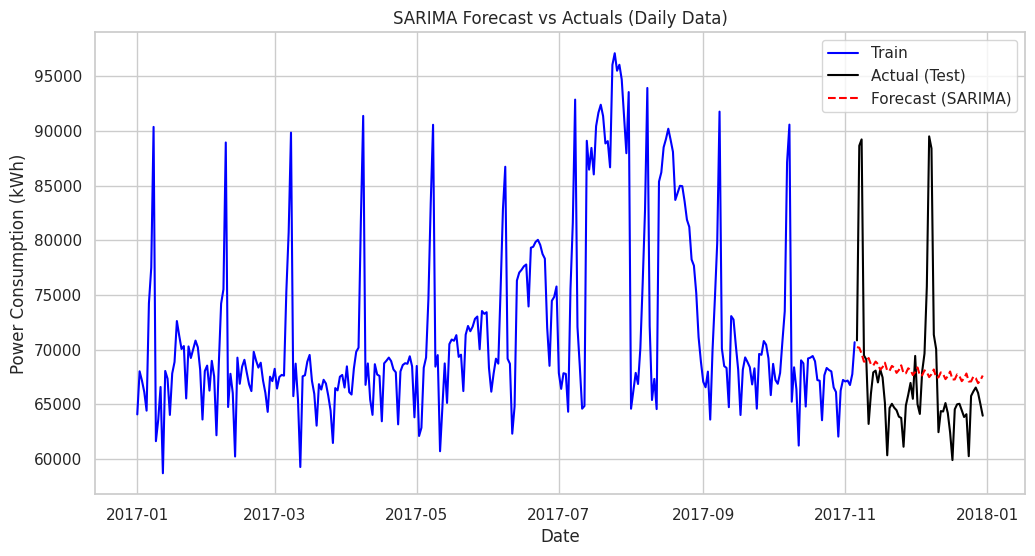

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train', color='blue')
plt.plot(test.index, test, label='Actual (Test)', color='black')
plt.plot(test.index, forecast, label='Forecast (SARIMA)', color='red', linestyle='--')
plt.title("SARIMA Forecast vs Actuals (Daily Data)")
plt.xlabel("Date")
plt.ylabel("Power Consumption (kWh)")
plt.legend()
plt.grid(True)
plt.show()


In [47]:
import joblib

# Save the SARIMA model
joblib.dump(sarima_fit, "generalized_sarima_model.pkl")
print("✅ SARIMA model saved successfully!")

✅ SARIMA model saved successfully!


In [48]:
# ===============================================
# EXPORT GENERALIZED RANDOM FOREST MODEL + SCALER
# ===============================================

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import joblib

# 1️⃣ Load your cleaned dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset/powerconsumption.csv", encoding="latin1")

# 2️⃣ Feature engineering (same as before)
df["Datetime"] = pd.to_datetime(df["Datetime"])
df["Year"] = df["Datetime"].dt.year
df["Month"] = df["Datetime"].dt.month
df["Day"] = df["Datetime"].dt.day
df["Hour"] = df["Datetime"].dt.hour
df["DayOfWeek"] = df["Datetime"].dt.dayofweek
df["Is_Weekend"] = df["DayOfWeek"].apply(lambda x: 1 if x >= 5 else 0)

# 3️⃣ Select features and target
features = [
    "Temperature", "Humidity", "WindSpeed",
    "PowerConsumption_Zone1", "PowerConsumption_Zone2",
    "Hour", "DayOfWeek", "Is_Weekend", "Month"
]
target = "PowerConsumption_Zone3"

X = df[features]
y = df[target]

# 4️⃣ Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5️⃣ Train generalized Random Forest on entire dataset
rf_generalized = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)
rf_generalized.fit(X_scaled, y)

# 6️⃣ Save the model and scaler for Streamlit use
joblib.dump(rf_generalized, "rf_generalized_model.pkl")
joblib.dump(scaler, "rf_scaler.pkl")

print("✅ Generalized Random Forest model and scaler saved successfully!")


✅ Generalized Random Forest model and scaler saved successfully!
